In [1]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import numpy as np
import seaborn as sns
import math
import re
from sklearn.feature_extraction import FeatureHasher
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline
import matplotlib as mpl
mpl.style.use('dark_background')
sns.set_style("whitegrid")
gen_le = LabelEncoder()
enc = OneHotEncoder(handle_unknown='ignore')

Laptop data

In [3]:
data = pd.read_csv("../data/data.csv")
del data['URL']

In [4]:
data

NAME                   CPU  \
0                  ASUS VivoBook E12 E203   Intel Celeron N4000   
1                  Lenovo Ideapad 120S 14   Intel Celeron N3350   
2                   Dell Latitude 11 3189   Intel Celeron N3350   
3         HP Chromebook 11 (11a-na0021nr)       Mediatek MT8183   
4                  Lenovo Chromebook S330       Mediatek MT8173   
...                                   ...                   ...   
4503                       HP 17 (17-ca0)     AMD Ryzen 5 2500U   
4504                    HP 14 (14-dq1000)  Intel Core i3-1005G1   
4505                   Dell Inspiron 5482   Intel Core i5-8265U   
4506  Acer TravelMate P6 (TMP614-51-50FJ)   Intel Core i5-8365U   
4507                    HP ProBook 450 G7  Intel Core i5-10210U   

                                              GPU  \
0                          Intel UHD Graphics 600   
1             Intel HD Graphics 500 (Apollo Lake)   
2             Intel HD Graphics 500 (Apollo Lake)   
3                                ARM Mali-G72 MP3   
4                      Imagination PowerVR GX6250   
...                                           ...   
4503  AMD Radeon RX Vega 8 (Ryzen 2000/3000, 15W)   
4504                        Intel UHD Graphics G1   
4505                       Intel UHD Graphics 620   
4506                       Intel UHD Graphics 620   
4507                           Intel UHD Graphics   

                                DISPLAY                  STORAGE  \
0            11.6”, HD (1366 x 768), TN                 32GB SSD   
1            14.0”, HD (1366 x 768), TN                 32GB SSD   
2            11.6”, HD (1366 x 768), TN                 64GB SSD   
3            11.6”, HD (1366 x 768), TN                 32GB SSD   
4            14.0”, HD (1366 x 768), TN                 32GB SSD   
...                                 ...                      ...   
4503        17.3”, HD+ (1600 x 900), TN  1000GB SSD + 1000GB HDD   
4504         14.0”, HD (1366 x 768), TN               1000GB SSD   
4505  14.0”, Full HD (1920 x 1080), IPS   512GB SSD + 2000GB HDD   
4506  14.0”, Full HD (1920 x 1080), IPS                256GB SSD   
4507         15.6”, HD (1366 x 768), TN   256GB SSD + 1000GB HDD   

                        RAM             WEIGHT    PRICE  
0                       2GB  0.98 kg (2.2 lbs)      158  
1                   2GB RAM  1.44 kg (3.2 lbs)      179  
2                  4GB DDR3  1.44 kg (3.2 lbs)      235  
3     4GB LPDDR4x, 3200 MHz  1.70 kg (3.7 lbs)   219.99  
4                  4GB DDR4  1.45 kg (3.2 lbs)   289.99  
...                     ...                ...      ...  
4503     8GB DDR4, 2400 MHz  2.45 kg (5.4 lbs)      969  
4504     32GB DDR4, 2666MHz  1.46 kg (3.2 lbs)   915.99  
4505     4GB DDR4, 2666 MHz  1.75 kg (3.9 lbs)      959  
4506               8GB DDR4  1.10 kg (2.4 lbs)  1349.99  
4507              16GB DDR4  2.00 kg (4.4 lbs)      949  

[4508 rows x 8 columns]

In [3]:
data.iloc[0]

NAME           ASUS VivoBook E12 E203
CPU               Intel Celeron N4000
GPU            Intel UHD Graphics 600
DISPLAY    11.6”, HD (1366 x 768), TN
STORAGE                      32GB SSD
RAM                               2GB
WEIGHT              0.98 kg (2.2 lbs)
PRICE                             158
Name: 0, dtype: object

Missing values analyzing

In [5]:
for col in data.columns:
    data[col].replace(" ", np.nan, inplace=True)

In [7]:
data.isnull().sum()

NAME        0
CPU        31
GPU        18
DISPLAY     6
STORAGE     3
RAM         1
WEIGHT      1
PRICE       1
dtype: int64

<AxesSubplot:xlabel='Name', ylabel='Count'>

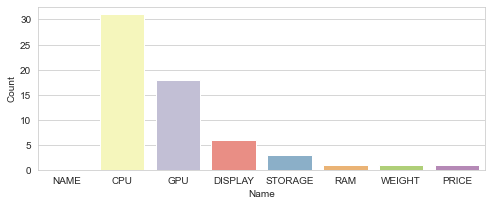

In [8]:
missing_values = data.isnull().sum().to_frame()
missing_values.columns=["Count"]
missing_values['Name'] = missing_values.index
plt.figure(figsize=(8,3))
sns.barplot(x='Name', y='Count', data=missing_values)

CPU, GPU data

In [9]:
cpudata = pd.read_csv("../CPUs/processor_data.csv")
gpudata = pd.read_csv("../GPUs/gpu_data.csv")

Merging with CPU data

In [10]:
data = pd.merge(data, cpudata, on="CPU")
data = pd.merge(data, gpudata, on="GPU")

In [11]:
del data["CPU"]
del data["GPU"]

In [12]:
data

NAME                            DISPLAY  \
0              ASUS VivoBook E12 E203         11.6”, HD (1366 x 768), TN   
1     Samsung Chromebook 4 (XE310XBA)         11.6”, HD (1366 x 768), TN   
2          HP Stream 11 (11-ak0020nr)         11.6”, HD (1366 x 768), TN   
3     Samsung Chromebook 4 (XE310XBA)         11.6”, HD (1366 x 768), TN   
4           HP Chromebook 14 (14a-na)         14.0”, HD (1366 x 768), TN   
...                               ...                                ...   
4484             Dell Precision M7510   15.6”, Full HD (1920 x 1080), TN   
4485             Razer Blade Pro 2013        14.0”, HD+ (1600 x 900), TN   
4486                       Lenovo Z50         15.6”, HD (1366 x 768), TN   
4487                Lenovo Yoga 3 Pro     13.3”, QHD+ (3200 x 1800), IPS   
4488             ASUS ZenBook UX305FA  13.3”, Full HD (1920 x 1080), IPS   

         STORAGE                   RAM             WEIGHT    PRICE  cpu_cores  \
0       32GB SSD                   2GB  0.98 kg (2.2 lbs)      158          2   
1       32GB SSD            4GB LPDDR4  1.18 kg (2.6 lbs)   252.99          2   
2       32GB SSD    4GB DDR3, 1600 MHz  1.07 kg (2.4 lbs)      263          2   
3       16GB SSD  4GB LPDDR4, 2133 MHz  1.18 kg (2.6 lbs)      269          2   
4       32GB SSD  4GB LPDDR4, 2400 MHz  1.46 kg (3.2 lbs)   269.99          2   
...          ...                   ...                ...      ...        ...   
4484  1000GB SSD             32GB DDR4    2.74 kg (6 lbs)     2700          4   
4485   256GB SSD             8GB DDR3L  2.98 kg (6.6 lbs)  2999.11          4   
4486  1000GB HDD   12GB DDR3, 1600 MHz  2.50 kg (5.5 lbs)      649          4   
4487   512GB SSD   8GB (soldered) DDR3  1.19 kg (2.6 lbs)   769.88          2   
4488   256GB SSD              8GB DDR3  1.20 kg (2.6 lbs)   828.88          2   

      cpu_threads  cpu_basespeed  cpu_turbospeed  gpu_basespeed  \
0               2            1.1             2.6          300.0   
1               2            1.1             2.6          300.0   
2               2            1.1             2.6          300.0   
3               2            1.1             2.6          300.0   
4               2            1.1             2.6          300.0   
...           ...            ...             ...            ...   
4484            8            2.8             3.7         1038.0   
4485            8            2.2             3.2          850.0   
4486            4            2.1             3.3          553.0   
4487            4            1.2             2.9          100.0   
4488            4            0.8             2.0          100.0   

      gpu_turbospeed  pixel_shaders  gpu_memory  memory_speed  
0              700.0           12.0         0.0           0.0  
1              700.0           12.0         0.0           0.0  
2              700.0           12.0         0.0           0.0  
3              700.0           12.0         0.0           0.0  
4              700.0           12.0         0.0           0.0  
...              ...            ...         ...           ...  
4484          1197.0          640.0         4.0        5000.0  
4485           850.0          768.0         2.0        4000.0  
4486           686.0          512.0         0.0           NaN  
4487           900.0           24.0         0.0           0.0  
4488           900.0           24.0         0.0           0.0  

[4489 rows x 15 columns]

# NULL Values

In [13]:
for col in data.columns:
    data.dropna(subset=[col], inplace=True)

In [14]:
data.isnull().sum()

NAME              0
DISPLAY           0
STORAGE           0
RAM               0
WEIGHT            0
PRICE             0
cpu_cores         0
cpu_threads       0
cpu_basespeed     0
cpu_turbospeed    0
gpu_basespeed     0
gpu_turbospeed    0
pixel_shaders     0
gpu_memory        0
memory_speed      0
dtype: int64

In [15]:
len(data)

4202

# PRICE

In [16]:
def preprocess_price(value):
    if "UPCOMING" in value:
        return 0
    if "NOT AVAILABLE" in value:
        return 0
    try:
        value = int(np.floor(float(value)))
    except:
        return 0
    return value

In [17]:
data["price"] = data["PRICE"].apply(preprocess_price)
data["price"] = data["price"].astype(float)

In [18]:
data.drop("PRICE", inplace = True, axis = 1)

In [19]:
data = data[data['price'] != 0]

# RAM

In [20]:
def preprocess_ram(value):
    words = ["GB","gb","Gb","gB", "DDR"]
    for word in words:
        if word in value:
            value = value[0:value.find(word)]
            if "x" in value:
                nums = value.replace(" ","").split("x")
                return str(int(nums[0]) * int(nums[1]))
    return value.replace(" ","")

In [21]:
data["ram"] = data["RAM"].apply(preprocess_ram)

In [22]:
data["ram"] = data["ram"].astype(float)

In [23]:
data["ram"].unique()

array([  2.,   4.,   6.,   8.,  16.,  12.,  20.,  32.,  24.,  40.,  64.,
        36., 128.])

<AxesSubplot:ylabel='price'>

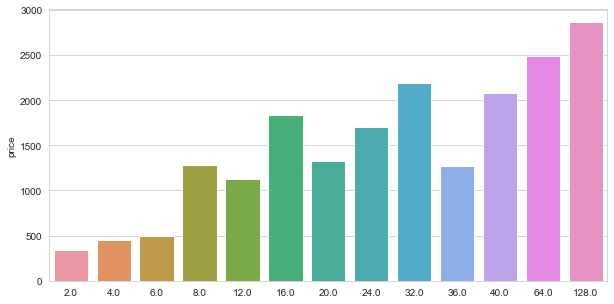

In [24]:
prices = data.groupby("ram").mean()["price"]
ram = [ram for ram, data in data.groupby('ram')]

plt.figure(figsize=(10,5))
sns.barplot(ram, prices)

In [25]:
data.drop("RAM", inplace = True, axis = 1)

# WEIGHT

In [26]:
def preprocess_weight(value):
    value = float(value.split(" ")[0])
    if value == 0:
        return None
    else:
        return value

In [27]:
data["weight"] = data["WEIGHT"].apply(preprocess_weight)

In [28]:
data[data["weight"].isnull()]

NAME                           DISPLAY     STORAGE  \
378   Dell Chromebook 11 3180        11.6”, HD (1366 x 768), TN    16GB SSD   
858           HP ZBook 14u G4  14.0”, Full HD (1920 x 1080), TN  1000GB HDD   
2158           LG Gram 17Z990   17.3”, WQXGA (2560 x 1600), IPS   512GB SSD   
2166      LG Gram 17 (17Z990)   17.3”, WQXGA (2560 x 1600), IPS   512GB SSD   
2170           LG Gram 17Z990   17.3”, WQXGA (2560 x 1600), IPS  1000GB SSD   
3472  Lenovo ideapad 720S 15″  15.6”, 4K UHD (3840 x 2160), IPS   512GB SSD   

     WEIGHT  cpu_cores  cpu_threads  cpu_basespeed  cpu_turbospeed  \
378       0          2            2            1.6            2.48   
858       0          2            4            2.7            3.50   
2158      0          4            8            1.8            4.60   
2166      0          4            8            1.8            4.60   
2170      0          4            8            1.8            4.60   
3472      0          4            8            2.8            3.80   

      gpu_basespeed  gpu_turbospeed  pixel_shaders  gpu_memory  memory_speed  \
378           320.0           640.0           12.0         0.0           0.0   
858           300.0          1050.0           24.0         0.0           0.0   
2158          300.0          1150.0           24.0         0.0           0.0   
2166          300.0          1150.0           24.0         0.0           0.0   
2170          300.0          1150.0           24.0         0.0           0.0   
3472         1493.0          1620.0          768.0         2.0        7000.0   

       price   ram  weight  
378    399.0   4.0     NaN  
858    669.0   8.0     NaN  
2158  1789.0  16.0     NaN  
2166  1999.0  16.0     NaN  
2170  2175.0  16.0     NaN  
3472  1688.0  16.0     NaN

In [29]:
data["weight"].fillna(data["weight"].mean(), inplace=True)

<AxesSubplot:xlabel='weight', ylabel='price'>

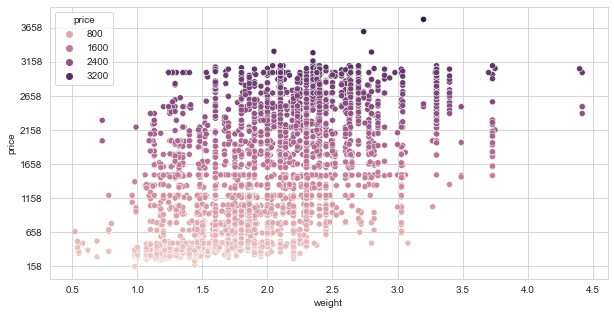

In [30]:
plt.figure(figsize=(10,5))
plt.yticks(np.arange(min(data["price"]), max(data["price"])+1, 500))
sns.scatterplot(data=data, y="price", x="weight", hue="price")

In [31]:
data.drop("WEIGHT", inplace = True, axis = 1)

# DISPLAY

In [32]:
data["DISPLAY"].head()

0    11.6”, HD (1366 x 768), TN
1    11.6”, HD (1366 x 768), TN
2    11.6”, HD (1366 x 768), TN
3    11.6”, HD (1366 x 768), TN
4    14.0”, HD (1366 x 768), TN
Name: DISPLAY, dtype: object

Inches

In [33]:
def preprocess_inches(value):
    inches = value.split(",")[0].replace("”","").replace("\"","").replace("″","")
    return float(inches)

In [34]:
data["inch"] = data["DISPLAY"].apply(preprocess_inches)

<AxesSubplot:xlabel='inch', ylabel='price'>

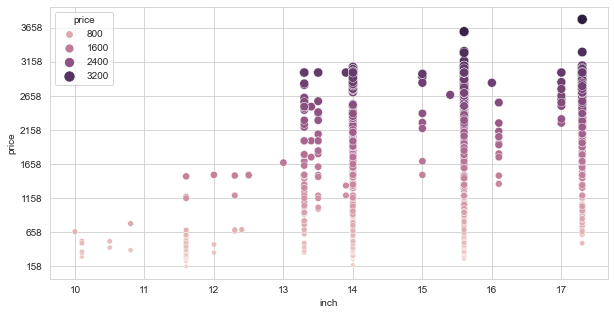

In [35]:
plt.figure(figsize=(10,5))
plt.yticks(np.arange(min(data["price"]), max(data["price"])+1, 500))
sns.scatterplot(data=data,y="price",x="inch", hue="price", size="price", sizes=(20,100))

In [36]:
def preprocess_resolution(value):
    resolution = value.split(",")[1]
    try:
        res = resolution.split("(")[1].split(")")[0].replace(" ","")
    except:
        res = resolution.replace(" ","")
    
    resX = int(res.split("x")[0])
    resY = int(res.split("x")[1])
    return float((resX * resY)/1000000)
    

In [37]:
data["resolution"] = data["DISPLAY"].apply(preprocess_resolution)

<AxesSubplot:xlabel='resolution', ylabel='price'>

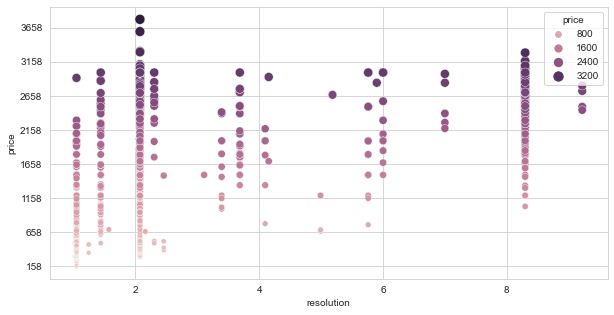

In [38]:
plt.figure(figsize=(10,5))
plt.yticks(np.arange(min(data["price"]), max(data["price"])+1, 500))
sns.scatterplot(data=data,y="price",x="resolution", hue="price", size="price", sizes=(20,100))

<AxesSubplot:ylabel='price'>

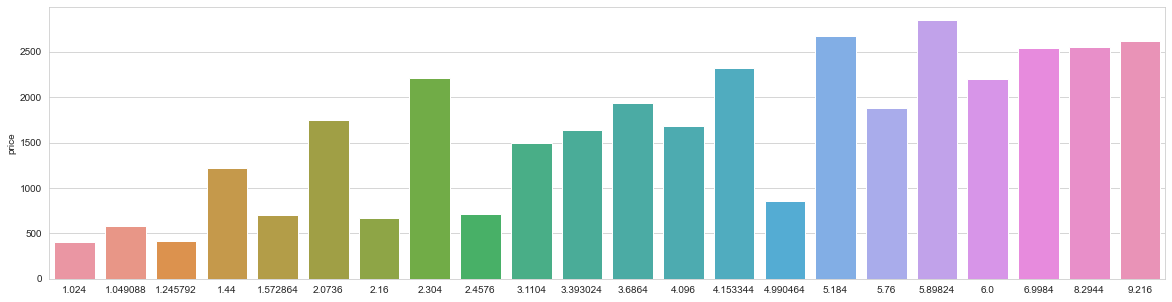

In [39]:
prices = data.groupby("resolution").mean()["price"]
resolution = [resolution for resolution, data in data.groupby('resolution')]

plt.figure(figsize=(20,5))
sns.barplot(resolution, prices)

In [40]:
data["resolution"].unique()

array([1.049088, 2.0736  , 1.245792, 2.4576  , 1.024   , 2.304   ,
       1.44    , 5.76    , 3.393024, 3.6864  , 6.      , 4.990464,
       1.572864, 8.2944  , 4.096   , 9.216   , 4.153344, 6.9984  ,
       2.16    , 5.184   , 3.1104  , 5.89824 ])

In [41]:
data.drop("DISPLAY", inplace = True, axis = 1)

In [42]:
data.head()

NAME   STORAGE  cpu_cores  cpu_threads  \
0           ASUS VivoBook E12 E203  32GB SSD          2            2   
1  Samsung Chromebook 4 (XE310XBA)  32GB SSD          2            2   
2       HP Stream 11 (11-ak0020nr)  32GB SSD          2            2   
3  Samsung Chromebook 4 (XE310XBA)  16GB SSD          2            2   
4        HP Chromebook 14 (14a-na)  32GB SSD          2            2   

   cpu_basespeed  cpu_turbospeed  gpu_basespeed  gpu_turbospeed  \
0            1.1             2.6          300.0           700.0   
1            1.1             2.6          300.0           700.0   
2            1.1             2.6          300.0           700.0   
3            1.1             2.6          300.0           700.0   
4            1.1             2.6          300.0           700.0   

   pixel_shaders  gpu_memory  memory_speed  price  ram  weight  inch  \
0           12.0         0.0           0.0  158.0  2.0    0.98  11.6   
1           12.0         0.0           0.0  252.0  4.0    1.18  11.6   
2           12.0         0.0           0.0  263.0  4.0    1.07  11.6   
3           12.0         0.0           0.0  269.0  4.0    1.18  11.6   
4           12.0         0.0           0.0  269.0  4.0    1.46  14.0   

   resolution  
0    1.049088  
1    1.049088  
2    1.049088  
3    1.049088  
4    1.049088

# STORAGE

In [43]:
data["STORAGE"].unique()

array(['32GB SSD', '16GB SSD', '64GB SSD', '128GB SSD', '256GB SSD',
       '512GB SSD', '1000GB HDD', '500GB HDD', '160GB SSD', '64GB HDD',
       '1000GB SSD', '128GB SSD + 1000GB HDD', '128GB SSD + 500GB HDD',
       '256GB SSD + 1000GB HDD', '2000GB SSD + 2000GB HDD',
       '2000GB SSD + 500GB HDD', '512GB SSD + 1000GB HDD',
       '256GB SSD + 500GB HDD', '1000GB SSD + 1000GB HDD', '2000GB SSD',
       '512GB SSD + 500GB HDD', '256GB SSD + 2000GB HDD',
       '512GB SSD + 2000GB HDD', '2000GB HDD', '120GB SSD',
       '1000GB SSD + 500GB HDD', '256GB HDD', '500GB SSD', '180GB SSD',
       '16GB SSD + 500GB HDD', '1000GB SSD + 2000GB HDD',
       '128GB SSD + 2000GB HDD', '4000GB SSD', '250GB SSD',
       '500GB SSD + 2000GB HDD', '2256GB SSD', '1500GB SSD', '1256GB SSD',
       '200GB SSD + 500GB HDD', '2000GB SSD + 1000GB HDD', '3000GB SSD',
       '4256GB SSD', '4500GB SSD', '6000GB SSD', '5000GB SSD',
       '16GB SSD + 2000GB HDD', '16GB SSD + 1000GB HDD',
       '1024GB SSD 

In [44]:
def preprocess_hdd(value):
    val = '0'
    if ("GB HDD") in value:
        try:
            val=value.split(" + ")[1].split("GB")[0]
        except:
            val=value.split("GB")[0]
    return float(val)

In [45]:
data["hdd"] = data["STORAGE"].apply(preprocess_hdd)

<AxesSubplot:ylabel='price'>

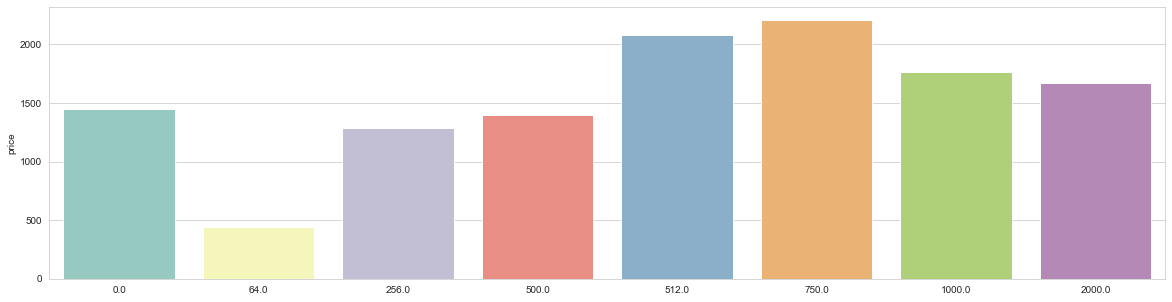

In [46]:
prices = data.groupby("hdd").mean()["price"]
hdd = [hdd for hdd, data in data.groupby('hdd')]

plt.figure(figsize=(20,5))
sns.barplot(hdd, prices)

In [47]:
data.drop("hdd", inplace = True, axis = 1)

In [48]:
def preprocess_ssd(value):
    val = '0'
    if "GB SSD" in value:
        val = value.split("GB SSD")[0]
    return float(val)

In [49]:
data["ssd"] = data["STORAGE"].apply(preprocess_ssd)

<AxesSubplot:ylabel='price'>

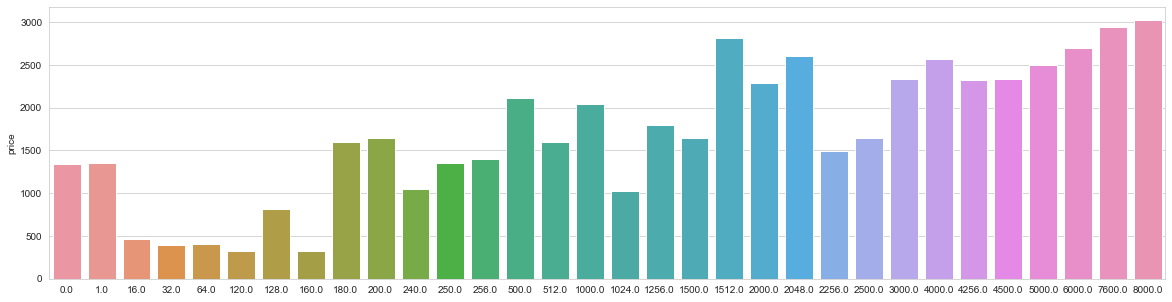

In [50]:
prices = data.groupby("ssd").mean()["price"]
ssd = [ssd for ssd, data in data.groupby('ssd')]

plt.figure(figsize=(20,5))
sns.barplot(ssd, prices)

In [51]:
data = data[data['ssd'] != 0]

In [52]:
data.drop("STORAGE", inplace = True, axis = 1)

# NAME

In [53]:
data.drop("NAME", inplace = True, axis = 1)

In [54]:
# data.gpu_basespeed = data.gpu_basespeed.apply(lambda x: x / 1000)
# data.gpu_turbospeed = data.gpu_turbospeed.apply(lambda x: x / 1000)
# data.memory_speed = data.memory_speed.apply(lambda x: x / 1000)

# CPU Plots

<AxesSubplot:xlabel='CPU turbo speed', ylabel='price'>

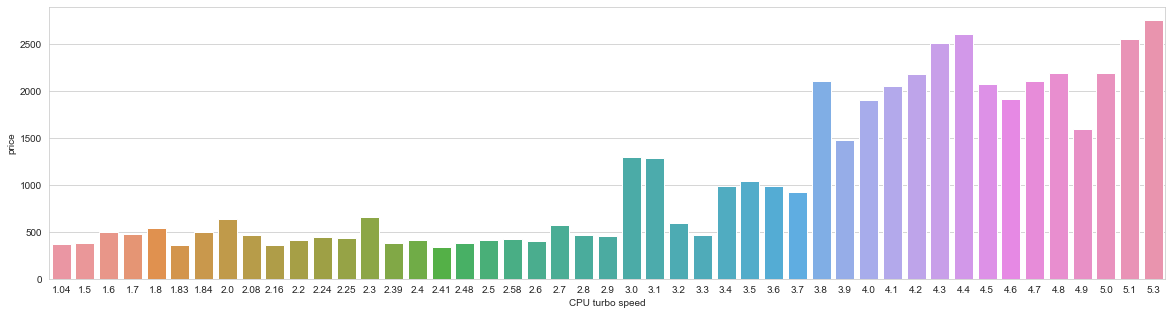

In [55]:
prices = data.groupby("cpu_turbospeed").mean()["price"]
cpu_speed = [cpu_speed for cpu_speed, data in data.groupby('cpu_turbospeed')]

plt.figure(figsize=(20,5))
plt.xlabel("CPU turbo speed")
sns.barplot(cpu_speed, prices)

<AxesSubplot:ylabel='price'>

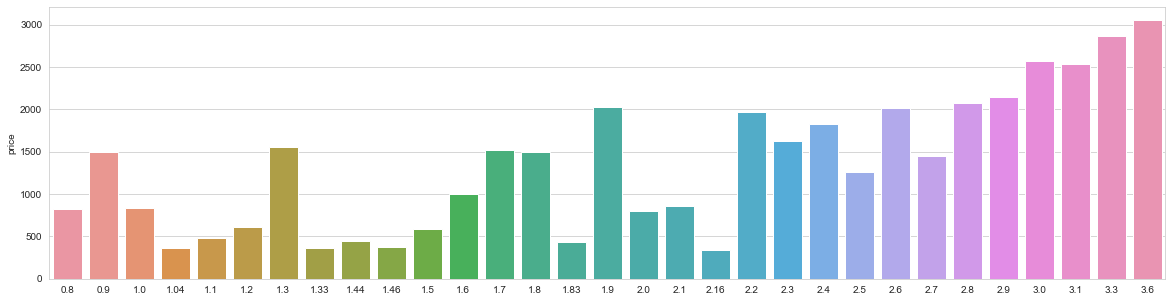

In [56]:
prices = data.groupby("cpu_basespeed").mean()["price"]
cpu_speed = [cpu_speed for cpu_speed, data in data.groupby('cpu_basespeed')]

plt.figure(figsize=(20,5))

sns.barplot(cpu_speed, prices)

<AxesSubplot:xlabel='CPU cores', ylabel='price'>

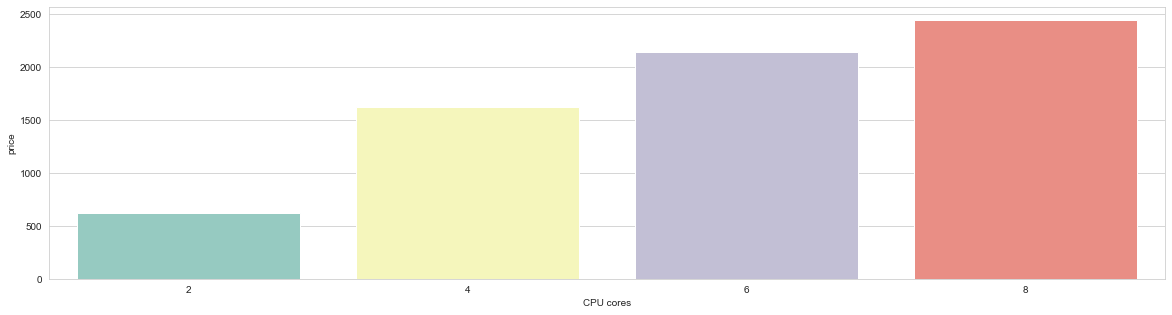

In [57]:
prices = data.groupby("cpu_cores").mean()["price"]
cpu_speed = [cpu_speed for cpu_speed, data in data.groupby('cpu_cores')]

plt.figure(figsize=(20,5))
plt.xlabel("CPU cores")
sns.barplot(cpu_speed, prices)

# GPU plots

<AxesSubplot:xlabel='GPU memory', ylabel='price'>

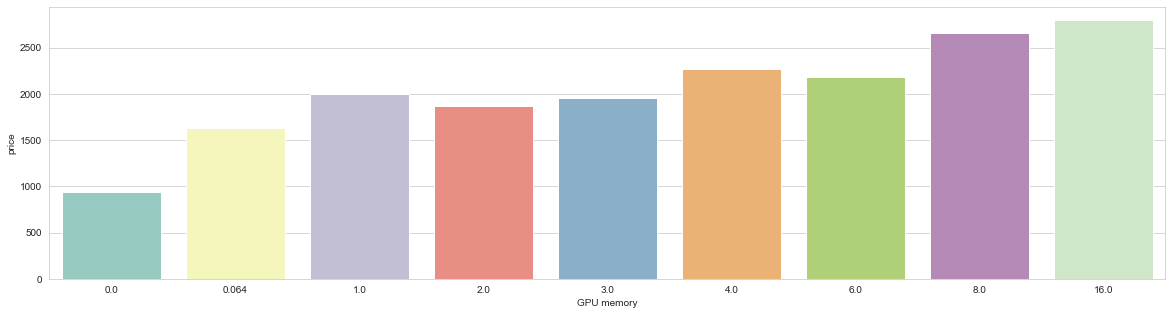

In [58]:
prices = data.groupby("gpu_memory").mean()["price"]
gpu_memory = [gpu_memory for gpu_memory, data in data.groupby('gpu_memory')]

plt.figure(figsize=(20,5))
plt.xlabel("GPU memory")
sns.barplot(gpu_memory, prices)

<AxesSubplot:xlabel='gpu_turbospeed', ylabel='gpu_basespeed'>

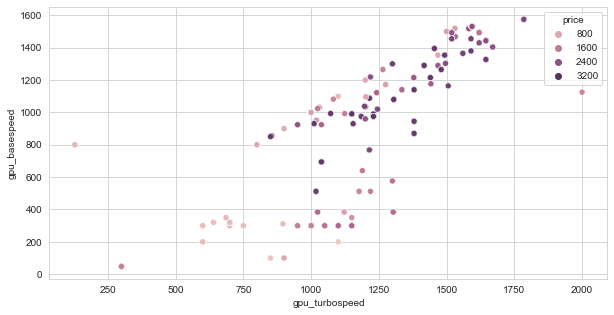

In [59]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data,x="gpu_turbospeed", y="gpu_basespeed", hue="price")

In [60]:
from sklearn.preprocessing import StandardScaler
scaleobj = StandardScaler()
scaled_data = scaleobj.fit_transform(data)
scaled_df = pd.DataFrame(scaled_data, columns = data.columns)

# Heatmap

<AxesSubplot:>

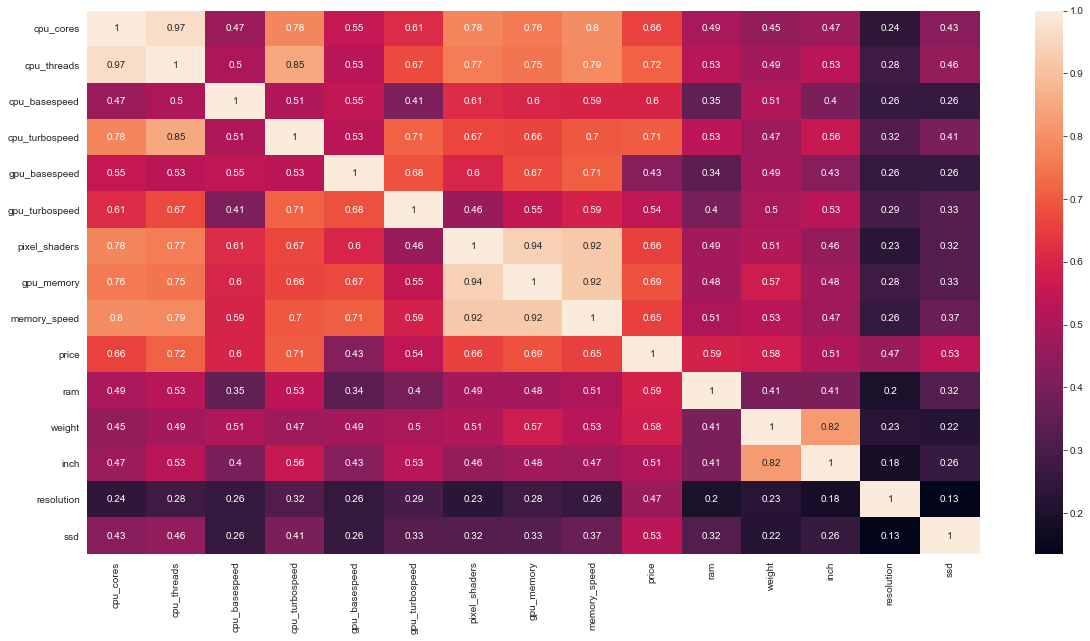

In [61]:
plt.figure(figsize=(20,10))
sns.heatmap(scaled_df.corr(), annot=True)

In [62]:
data.to_csv("preprocessed_data/df2.csv")